In [1]:
import numpy as np
import matplotlib.pyplot as plt
from microhebb.MNIST import data
from microhebb.nets import softmax_classifier

In [2]:
d = data()

Data loaded


(<matplotlib.image.AxesImage at 0x26b00db0750>,
 'label:[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]',
 np.float64(0.0))

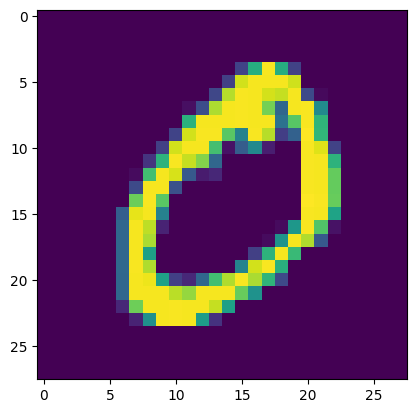

In [3]:
inputs, outputs = d.prepared_training()

i = 1

plt.imshow(inputs[i]), f'label:{outputs[i]}', inputs[i].min()

In [40]:
T = 60000

arch = [28*28, 20, 10]

c = softmax_classifier(arch)

# unsupervised learning

def unsupervised_sgd(model, X, T):
        
    for t in range(T):
        
        i = np.random.randint(len(X))
        z = model.unsupervised_forward(X[i].reshape((28*28, 1)).T)

c.eta=0.01

unsupervised_sgd(c, inputs, T*1)
    
# supervised learning

def supervised_sgd(model, X, Y, T):
        
    sqreE = []
        
    for t in range(T):
        
        i = np.random.randint(len(X))
        z = model.supervised_forward(X[i].reshape((28*28, 1)).T, Y[i].reshape((10,1)))
        sqreE += [(np.argmax(Y[i]) - np.argmax(z[-1]))**2]
        
    return sqreE


IndexError: index 74 is out of bounds for axis 1 with size 20

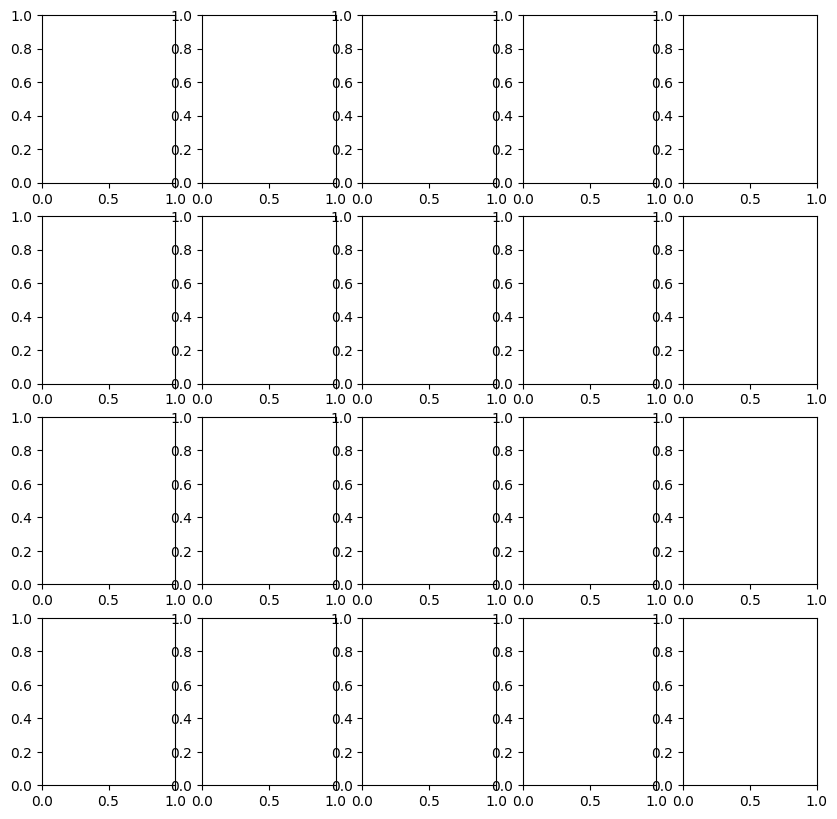

In [41]:
#c.layers[0].W_norm()

_, axes = plt.subplots(4, 5, figsize=(10, 10))

for a in range(5):
    
    for b in range(4):
        
        axes[b,a].imshow(c.layers[0].W[:,np.random.randint(100)].reshape((28, 28)))

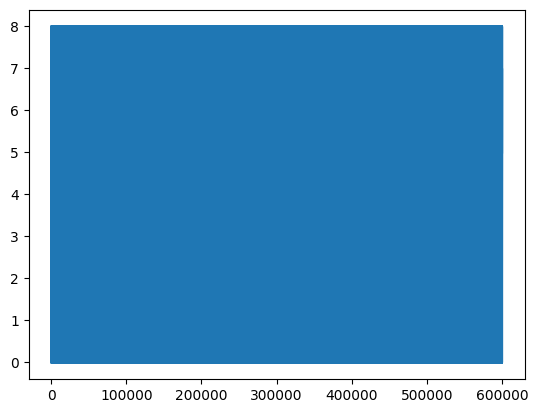

In [33]:
c.eta=0.000001

plt.plot(np.sqrt(supervised_sgd(c, inputs, outputs, T*10)))

plt.show()

In [34]:
total = 0
rand=0
for t in range(T):
    
    z = c.forward(inputs[t].reshape((28*28, 1)).T)

    rand += int(np.argmax(outputs[t]) == np.random.randint(10))#np.argmax(z[-1]))
    total += int(np.argmax(outputs[t]) == np.argmax(z[-1]))
total/T, rand/T

(0.11236666666666667, 0.10025)

np.int64(1)

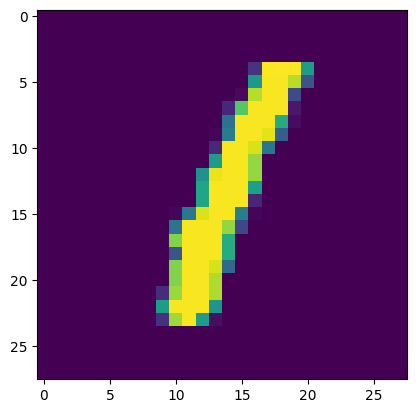

In [8]:
i = 105
plt.imshow(inputs[i])

c.forward(inputs[i].reshape((28*28, 1)).T)[-1].argmax()